In [1]:
from Model import np, TS, UCB, Bandit, TS2
from matplotlib import pyplot as plt
from tqdm.notebook import tqdm
import csv
from time import perf_counter

np.random.seed(0)

In [2]:
best_c = UCB.hyperparameter_tuning(20)
print("Best c for UCB:", best_c)

100%|██████████| 20/20 [04:14<00:00, 12.71s/it]

Best c for UCB: 0.8542355223214588


In [3]:
file1, file2 = open("regret.csv", "w"), open("time.csv", "w")
time_writer = csv.writer(file2)
time_writer.writerow(["# of Bandits", "UCB", "TS"])
regret_writer = csv.writer(file1)
regret_writer.writerow(["# of Bandits", "# of Iterations", "UCB", "TS"])

37

In [4]:
def run(alg, n, T=None, *, print_values=False, bandits=None, loading=False, name=None, write_values=False):
    bandits = [Bandit(i) for i in range(n)] if bandits is None else bandits
    optimal = max(bandits, key=lambda index: index.mean).mean
    if T is None:
        T = n * 10
    regret = 0
    alg = alg(n, bandits)
    if name == "UCB tuned":
        alg.change_c(best_c)
    regrets = [0]
    bandit_count = {i:0 for i in bandits}
    time = 0
    for i in tqdm(range(T)) if loading else range(T):
        start = perf_counter()
        bandit, reward = alg.draw()
        end = perf_counter()
        time += end-start
        bandit_count[bandit] += 1

        regret += optimal - bandit.mean
        regrets.append(regret)
    time /= T
    plt.plot(range(T+1), regrets, label=alg.name if name is None else name)
    if print_values:
        print(optimal)
        
        for key, value in bandit_count.items():
            print(key, value)
        print()
    most = max(bandit_count, key=bandit_count.get)
    # print(most, bandit_count[most])
    # if alg.name == "UCB":
    #     for p, b in zip(alg.params, alg.bandits):
    #         print(int(p.N), b.mean)
    # if alg.name == "TS":
    #     for p, b in zip(alg.params, alg.bandits):
    #         print(p.nu, b.mean)
        # for p in alg.params:
        #     print(p.bandit)
        #     print(sum(np.sqrt(1/np.random.gamma(p.alpha, 1/p.beta)) for _ in range(num))/num)
        #     print(p.alpha/p.beta, p.nu, np.sqrt(p.beta/p.alpha))
        #     print()
    # print()
    return bandits, time, regret


Bandit 48: mean 91.7619712184051 std 21.645875254937803
Bandit 51: mean 99.90736549288007 std 13.961439266002875
Bandit 19: mean 98.31937320381535 std 2.0089599000920835
Bandit 106: mean 99.69964046744334 std 8.465598707371369
Bandit 210: mean 99.27608938210199 std 15.85265357978022
Bandit 251: mean 99.74719613436066 std 22.353978001027603
Bandit 106: mean 99.91362942015742 std 19.12756601789088
Bandit 360: mean 99.9100054904713 std 0.7588406907161699
Bandit 424: mean 99.95765296800568 std 22.391832067923787
Bandit 456: mean 99.94005476434151 std 18.27359596067061
Bandit 422: mean 99.98697611061131 std 23.78383321697686
Bandit 291: mean 99.96629346197268 std 20.608509313740477
Bandit 29: mean 99.94372966243823 std 3.0270349281619673
Bandit 327: mean 99.83741071050619 std 12.188925422941232
Bandit 434: mean 99.9912081538104 std 24.908552124018417
Bandit 650: mean 99.8917745297447 std 17.561548513487736
Bandit 742: mean 99.8207876025687 std 7.964870522729445
Bandit 484: mean 99.899452447

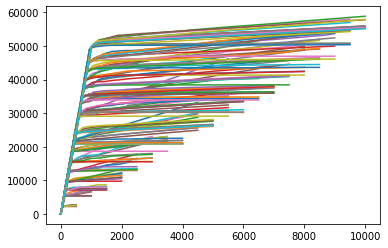

In [5]:
for n in range(50, 1001, 50):
    bandits = [Bandit(i) for i in range(n)]
    optimal = max(bandits, key=lambda index: index.mean)
    print(optimal)
    rUCB, rTS, rUCBt = [], [], []
    tUCB, tTS, tUCBt = [], [], []
    try:
        for _ in range(3):
            # run(TS, n, bandits=bandits)
            _, timeUCB, regretUCB = run(UCB, n, bandits=bandits)
            _, timeTS, regretTS = run(TS2, n, bandits=bandits)
            # run(TS2, n, bandits=bandits)
            _, timeUCBt, regretUCBt = run(UCB, n, bandits=bandits, name="UCB tuned")
            rUCB.append(regretUCB)
            rTS.append(regretTS)
            rUCBt.append(regretUCBt)
            tUCB.append(timeUCB)
            tTS.append(timeTS)
            tUCBt.append(timeUCBt)  
    except KeyboardInterrupt:
        time_writer.writerow([n] +tUCB + tTS + tUCBt + [np.average(tUCB), np.average(tTS), np.average(tUCBt)])
        regret_writer.writerow([n] +tUCB + tTS + tUCBt+[np.average(rUCB), np.average(rTS), np.average(rUCBt)])
     
    time_writer.writerow([n] +tUCB + tTS + tUCBt + [np.average(tUCB), np.average(tTS), np.average(tUCBt)])
    regret_writer.writerow([n] +tUCB + tTS + tUCBt+[np.average(rUCB), np.average(rTS), np.average(rUCBt)])
    

In [6]:
file1.close()
file2.close()

https://jmlr.csail.mit.edu/papers/volume18/15-154/15-154.pdf